In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [82]:
def agrupar_colunas(row, colunas):
    valor = ''
    for coluna in colunas:
        valor += row[coluna]
    return valor

In [2]:
def outliers_iqr(values):
    quartile_1, quartile_3 = np.percentile(values, [50, 75])
    print('quartile 1, quartile 3', quartile_1, quartile_3)
    iqr = quartile_3 - quartile_1
    print('iqr', iqr)
    lower_bound = quartile_1 - (iqr * 1.5)
    print(lower_bound)
    upper_bound = quartile_3 + (iqr * 1.5)
    print(upper_bound)
    #return np.where((values > upper_bound) | (values < lower_bound))
    result = (values <= upper_bound) & (values >= lower_bound)
    #print(result)
    return result

In [3]:
dados_df = pd.read_csv('resultados.csv')
#dados_df['Short Embedding'] = dados_df.apply(lambda row: get_short_embedding(row['Embedding']), axis=1)
dados_df

,Training Round,Epochs,Scenario,Embedding,Tagging Scheme,Capitalisation Dim,Lower,Char LSTM Dim,Word LSTM Dim,Precision,Recall,F1 Score
0,0,5,selective,Wang2Vec,iob,False,False,25,100,58.95,54.79,56.79
1,0,5,selective,Wang2Vec,iob,False,False,25,200,61.60,52.06,56.43
2,0,5,selective,Wang2Vec,iob,False,False,50,100,66.50,47.47,55.40
3,0,5,selective,Wang2Vec,iob,False,False,50,200,58.54,50.74,54.36
4,0,5,selective,Wang2Vec,iob,False,True,25,100,66.28,67.73,67.00
5,0,5,selective,Wang2Vec,iob,False,True,25,200,71.00,62.67,66.58
6,0,5,selective,Wang2Vec,iob,False,True,50,100,70.14,65.18,67.57
7,0,5,selective,Wang2Vec,iob,False,True,50,200,66.93,63.57,65.21
8,0,5,selective,Wang2Vec,iob,True,False,25,100,58.62,57.55,58.08
9,0,5,selective,Wang2Vec,iob,True,False,25,200,64.42,50.45,56.59


In [84]:
dados_df['Cap./Norm.'] = dados_df.apply(lambda row: agrupar_colunas(row, colunas=['Capitalisation Dim','Lower']), axis=1)

TypeError: ('must be str, not bool', 'occurred at index 320')

In [4]:
groups = dados_df.groupby(['Epochs','Embedding','Scenario','Tagging Scheme','Capitalisation Dim','Lower','Char LSTM Dim','Word LSTM Dim'])

In [5]:
len(groups)

96

In [6]:
first_group = groups.get_group((5,'Wang2Vec','selective','iob',False,True,50,200))
first_group

,Training Round,Epochs,Scenario,Embedding,Tagging Scheme,Capitalisation Dim,Lower,Char LSTM Dim,Word LSTM Dim,Precision,Recall,F1 Score
7,0,5,selective,Wang2Vec,iob,False,True,50,200,66.93,63.57,65.21
39,1,5,selective,Wang2Vec,iob,False,True,50,200,69.12,65.08,67.04
71,2,5,selective,Wang2Vec,iob,False,True,50,200,72.78,63.93,68.07
103,3,5,selective,Wang2Vec,iob,False,True,50,200,63.47,68.59,65.93
135,4,5,selective,Wang2Vec,iob,False,True,50,200,37.58,6.35,10.86
167,5,5,selective,Wang2Vec,iob,False,True,50,200,0.50,0.61,0.55
199,6,5,selective,Wang2Vec,iob,False,True,50,200,69.31,65.58,67.39
231,7,5,selective,Wang2Vec,iob,False,True,50,200,1.84,1.43,1.61
263,8,5,selective,Wang2Vec,iob,False,True,50,200,72.16,63.00,67.27
295,9,5,selective,Wang2Vec,iob,False,True,50,200,19.86,16.03,17.74


In [7]:
outliers_iqr(first_group['F1 Score'])

quartile 1, quartile 3 65.57 67.2125
iqr 1.6425
63.10625
69.67625


7       True
39      True
71      True
103     True
135    False
167    False
199     True
231    False
263     True
295    False
Name: F1 Score, dtype: bool

In [8]:
filtered_groups = []
for group in groups.groups:
    group_df = groups.get_group(group)
    #print(group_df)
    group_df = group_df[outliers_iqr(group_df['F1 Score'])]
    #print(group_df)
    #print(group_df['F1 Score'], outliers_iqr(group_df['F1 Score']))
    #filtered = outliers_iqr(group_df['F1 Score'].tolist())
    #print(filtered[0], type(filtered))
    #filtered = filtered.tolist()
    #print(filtered, type(filtered))
    #filter_list += filtered[0]
    filtered_groups.append(group_df)

quartile 1, quartile 3 56.945 57.82
iqr 0.875
55.6325
59.1325
quartile 1, quartile 3 55.145 56.1425
iqr 0.9975
53.64875
57.63875
quartile 1, quartile 3 56.1 56.53
iqr 0.43
55.455
57.175
quartile 1, quartile 3 56.09 56.465
iqr 0.375
55.5275
57.0275
quartile 1, quartile 3 65.14 65.71
iqr 0.57
64.285
66.565
quartile 1, quartile 3 64.13 65.2875
iqr 1.1575
62.39375
67.02375
quartile 1, quartile 3 64.875 65.3125
iqr 0.4375
64.21875
65.96875
quartile 1, quartile 3 64.765 65.0975
iqr 0.3325
64.26625
65.59625
quartile 1, quartile 3 55.925 57.73
iqr 1.805
53.2175
60.4375
quartile 1, quartile 3 55.745 56.5575
iqr 0.8125
54.52625
57.77625
quartile 1, quartile 3 56.79 57.145
iqr 0.355
56.2575
57.6775
quartile 1, quartile 3 56.395 56.92
iqr 0.525
55.6075
57.7075
quartile 1, quartile 3 65.78 66.1875
iqr 0.4075
65.16875
66.79875
quartile 1, quartile 3 65.23 65.6875
iqr 0.4575
64.54375
66.37375
quartile 1, quartile 3 65.595 66.545
iqr 0.95
64.17
67.97
quartile 1, quartile 3 64.36 65.01
iqr 0.65
63.385


In [9]:
dados_df = pd.concat(filtered_groups)
dados_df

,Training Round,Epochs,Scenario,Embedding,Tagging Scheme,Capitalisation Dim,Lower,Char LSTM Dim,Word LSTM Dim,Precision,Recall,F1 Score
320,0,5,selective,FastText,iob,False,False,25,100,58.83,56.51,57.64
352,1,5,selective,FastText,iob,False,False,25,100,64.86,50.77,56.96
384,2,5,selective,FastText,iob,False,False,25,100,63.22,51.77,56.93
416,3,5,selective,FastText,iob,False,False,25,100,59.05,56.76,57.88
448,4,5,selective,FastText,iob,False,False,25,100,58.87,55.11,56.93
544,7,5,selective,FastText,iob,False,False,25,100,63.90,50.59,56.47
576,8,5,selective,FastText,iob,False,False,25,100,59.73,56.47,58.05
608,9,5,selective,FastText,iob,False,False,25,100,62.26,55.36,58.61
353,1,5,selective,FastText,iob,False,False,25,200,59.18,53.53,56.21
385,2,5,selective,FastText,iob,False,False,25,200,59.14,51.85,55.25


In [10]:
dados_df.columns.values

array(['Training Round', 'Epochs', 'Scenario', 'Embedding',
       'Tagging Scheme', 'Capitalisation Dim', 'Lower', 'Char LSTM Dim',
       'Word LSTM Dim', 'Precision', 'Recall', 'F1 Score'], dtype=object)

In [11]:
dados_df.groupby('Embedding').describe(percentiles=[])

Char LSTM Dim                                         Epochs       \
                  count       mean        std   min   50%   max  count mean   
Embedding                                                                     
FastText          237.0  36.603376  12.494188  25.0  25.0  50.0  237.0  5.0   
Glove             193.0  37.176166  12.528303  25.0  25.0  50.0  193.0  5.0   
Wang2Vec          227.0  37.444934  12.527503  25.0  25.0  50.0  227.0  5.0   

                              F1 Score                                     \
           std  min  50%  max    count       mean       std    min    50%   
Embedding                                                                   
FastText   0.0  5.0  5.0  5.0    237.0  60.948861  4.424150  54.22  63.55   
Glove      0.0  5.0  5.0  5.0    193.0  58.944508  3.903552  52.91  57.26   
Wang2Vec   0.0  5.0  5.0  5.0    227.0  60.938326  5.234653  53.82  57.76   

                 Precision                                           Recall  \
             max     count       mean       std    min    50%    max  count   
Embedding                                                                     
FastText   66.86     237.0  64.293840  3.876621  54.02  64.86  73.04  237.0   
Glove      64.32     193.0  62.115492  3.756087  53.33  62.53  70.76  193.0   
Wang2Vec   68.26     227.0  64.707709  4.243702  55.18  65.47  72.78  227.0   

                                                    Training Round            \
                mean       std    min    50%    max          count      mean   
Embedding                                                                      
FastText   58.167384  5.954737  46.65  58.87  69.13          237.0  4.438819   
Glove      56.304145  5.280309  46.22  56.65  64.93          193.0  3.590674   
Wang2Vec   57.888546  7.083556  45.79  56.01  69.27          227.0  4.515419   

                                   Word LSTM Dim                         \
                std  min  50%  max         count        mean        std   
Embedding                                                                 
FastText   2.822701  0.0  4.0  9.0         237.0  151.476793  50.083960   
Glove      2.450195  0.0  4.0  8.0         193.0  148.186528  50.097056   
Wang2Vec   2.909168  0.0  5.0  9.0         227.0  148.017621  50.071097   

                                
             min    50%    max  
Embedding                       
FastText   100.0  200.0  200.0  
Glove      100.0  100.0  200.0  
Wang2Vec   100.0  100.0  200.0

In [38]:
dados_fscore_df = dados_df
del dados_fscore_df['Training Round']
del dados_fscore_df['Precision']
del dados_fscore_df['Recall']
dados_fscore_df.pivot_table(columns=['Epochs','Embedding','Scenario','Tagging Scheme','Capitalisation Dim','Lower','Char LSTM Dim','Word LSTM Dim'], aggfunc=[np.mean, np.max, np.min, np.std])

mean  \
         Epochs Embedding Scenario  Tagging Scheme Capitalisation Dim Lower Char LSTM Dim Word LSTM Dim              
F1 Score 5      FastText  selective iob            False              False 25            100            57.433750   
                                                                                          200            55.661429   
                                                                            50            100            56.150000   
                                                                                          200            56.316250   
                                                                      True  25            100            65.342857   
                                                                                          200            64.618750   
                                                                            50            100            65.050000   
                                                                                          200            65.031429   
                                                   True               False 25            100            56.256000   
                                                                                          200            55.933333   
                                                                            50            100            56.925000   
                                                                                          200            56.795714   
                                                                      True  25            100            65.835000   
                                                                                          200            65.557143   
                                                                            50            100            65.707778   
                                                                                          200            64.428750   
                                    iobes          False              False 25            100            55.972000   
                                                                                          200            55.975556   
                                                                            50            100            57.038000   
                                                                                          200            56.800000   
                                                                      True  25            100            65.802500   
                                                                                          200            65.245714   
                                                                            50            100            64.976250   
                                                                                          200            64.990000   
                                                   True               False 25            100            56.957500   
                                                                                          200            56.605556   
                                                                            50            100            57.460000   
                                                                                          200            56.691667   
                                                                      True  25            100            65.077143   
                                                                                          200            64.729000   
                                                                            50            100            65.184286   
                                                                                          200            65.460000   
                Glove     selective iob            False              False 25            100     

In [41]:
dados_fscore_df.pivot_table(columns=['Embedding'], aggfunc=[np.mean, np.max, np.min, np.std])

mean                               amax             \
Embedding             FastText       Glove    Wang2Vec   FastText      Glove   
Capitalisation Dim    0.523207    0.512953    0.519824       True       True   
Char LSTM Dim        36.603376   37.176166   37.444934         50         50   
Epochs                5.000000    5.000000    5.000000          5          5   
F1 Score             60.948861   58.944508   60.938326      66.86      64.32   
Lower                 0.510549    0.497409    0.444934       True       True   
Scenario                   NaN         NaN         NaN  selective  selective   
Tagging Scheme             NaN         NaN         NaN      iobes      iobes   
Word LSTM Dim       151.476793  148.186528  148.017621        200        200   

                                    amin                              std  \
Embedding            Wang2Vec   FastText      Glove   Wang2Vec   FastText   
Capitalisation Dim       True      False      False      False   0.500518   
Char LSTM Dim              50         25         25         25  12.494188   
Epochs                      5          5          5          5   0.000000   
F1 Score                68.26      54.22      52.91      53.82   4.424150   
Lower                    True      False      False      False   0.500947   
Scenario            selective  selective  selective  selective        NaN   
Tagging Scheme          iobes        iob        iob        iob        NaN   
Word LSTM Dim             200        100        100        100  50.083960   

                                          
Embedding               Glove   Wang2Vec  
Capitalisation Dim   0.501132   0.500711  
Char LSTM Dim       12.528303  12.527503  
Epochs               0.000000   0.000000  
F1 Score             3.903552   5.234653  
Lower                0.501294   0.498057  
Scenario                  NaN        NaN  
Tagging Scheme            NaN        NaN  
Word LSTM Dim       50.097056  50.071097

In [42]:
dados_fscore_df.pivot_table(columns=['Lower','Capitalisation Dim'], aggfunc=[np.mean, np.max, np.min, np.std])

mean       amax       amin  \
               Lower Capitalisation Dim                                     
Char LSTM Dim  False False                37.037037         50         25   
                     True                 37.429379         50         25   
               True  False                36.850649         50         25   
                     True                 36.890244         50         25   
Embedding      False False                      NaN   Wang2Vec   FastText   
                     True                       NaN   Wang2Vec   FastText   
               True  False                      NaN   Wang2Vec   FastText   
                     True                       NaN   Wang2Vec   FastText   
Epochs         False False                 5.000000          5          5   
                     True                  5.000000          5          5   
               True  False                 5.000000          5          5   
                     True                  5.000000          5          5   
F1 Score       False False                55.917716      58.61      52.91   
                     True                 56.192203      58.64      53.62   
               True  False                64.842662      68.07       60.5   
                     True                 65.022622      68.26      61.52   
Scenario       False False                      NaN  selective  selective   
                     True                       NaN  selective  selective   
               True  False                      NaN  selective  selective   
                     True                       NaN  selective  selective   
Tagging Scheme False False                      NaN      iobes        iob   
                     True                       NaN      iobes        iob   
               True  False                      NaN      iobes        iob   
                     True                       NaN      iobes        iob   
Word LSTM Dim  False False               152.469136        200        100   
                     True                148.587571        200        100   
               True  False               148.051948        200        100   
                     True                148.170732        200        100   

                                               std  
               Lower Capitalisation Dim             
Char LSTM Dim  False False               12.530157  
                     True                12.535261  
               True  False               12.523850  
                     True                12.523358  
Embedding      False False                     NaN  
                     True                      NaN  
               True  False                     NaN  
                     True                      NaN  
Epochs         False False                0.000000  
                     True                 0.000000  
               True  False                0.000000  
                     True                 0.000000  
F1 Score       False False                1.090349  
                     True                 1.111134  
               True  False                1.761986  
                     True                 1.693361  
Scenario       False False                     NaN  
                     True                      NaN  
               True  False                     NaN  
                     True                      NaN  
Tagging Scheme False False                     NaN  
                     True                      NaN  
               True  False                     NaN  
                     True                      NaN  
Word LSTM Dim  False False               50.093846  
                     True                50.121834  
               True  False               50.125045  
                     True                50.119564

In [43]:
dados_fscore_df.pivot_table(columns=['Tagging Scheme'], aggfunc=[np.mean, np.max, np.min, np.std])

mean                   amax                  amin  \
Tagging Scheme             iob       iobes        iob      iobes        iob   
Capitalisation Dim    0.508824    0.529968       True       True      False   
Char LSTM Dim        37.279412   36.829653         50         50         25   
Embedding                  NaN         NaN   Wang2Vec   Wang2Vec   FastText   
Epochs                5.000000    5.000000          5          5          5   
F1 Score             60.145765   60.582366      68.26      67.87      52.91   
Lower                 0.473529    0.495268       True       True      False   
Scenario                   NaN         NaN  selective  selective  selective   
Word LSTM Dim       148.529412  150.157729        200        200        100   

                                     std             
Tagging Scheme          iobes        iob      iobes  
Capitalisation Dim      False   0.500659   0.499890  
Char LSTM Dim              25  12.516474  12.501747  
Embedding            FastText        NaN        NaN  
Epochs                      5   0.000000   0.000000  
F1 Score                53.97   4.805727   4.508068  
Lower                   False   0.500035   0.500768  
Scenario            selective        NaN        NaN  
Word LSTM Dim             100  50.052029  50.078802

In [44]:
dados_fscore_df.pivot_table(columns=['Char LSTM Dim','Word LSTM Dim'], aggfunc=[np.mean, np.max, np.min, np.std])

mean       amax  \
                   Char LSTM Dim Word LSTM Dim                         
Capitalisation Dim 25            100             0.529412       True   
                                 200             0.500000       True   
                   50            100             0.527607       True   
                                 200             0.519481       True   
Embedding          25            100                  NaN   Wang2Vec   
                                 200                  NaN   Wang2Vec   
                   50            100                  NaN   Wang2Vec   
                                 200                  NaN   Wang2Vec   
Epochs             25            100             5.000000          5   
                                 200             5.000000          5   
                   50            100             5.000000          5   
                                 200             5.000000          5   
F1 Score           25            100            60.799000      68.26   
                                 200            59.900118      67.27   
                   50            100            60.418405      67.69   
                                 200            60.305974      68.07   
Lower              25            100             0.505882       True   
                                 200             0.476471       True   
                   50            100             0.484663       True   
                                 200             0.467532       True   
Scenario           25            100                  NaN  selective   
                                 200                  NaN  selective   
                   50            100                  NaN  selective   
                                 200                  NaN  selective   
Tagging Scheme     25            100                  NaN      iobes   
                                 200                  NaN      iobes   
                   50            100                  NaN      iobes   
                                 200                  NaN      iobes   

                                                     amin       std  
                   Char LSTM Dim Word LSTM Dim                       
Capitalisation Dim 25            100                False  0.500609  
                                 200                False  0.501477  
                   50            100                False  0.500776  
                                 200                False  0.501250  
Embedding          25            100             FastText       NaN  
                                 200             FastText       NaN  
                   50            100             FastText       NaN  
                                 200             FastText       NaN  
Epochs             25            100                    5  0.000000  
                                 200                    5  0.000000  
                   50            100                    5  0.000000  
                                 200                    5  0.000000  
F1 Score           25            100                54.31  4.664962  
                                 200                53.81  4.612124  
                   50            100                53.62  4.740298  
                                 200                52.91  4.644101  
Lower              25            100                False  0.501442  
                                 200                False  0.500922  
                   50            100                False  0.501305  
                                 200                False  0.500573  
Scenario           25            100            selective       NaN  
                                 200            selective       NaN  
                   50            100            selective       NaN  
                                 200            selective       NaN  
Tagging Scheme     25            100                  iob       NaN  
  

In [45]:
dados_fscore_df.pivot_table(columns=['Word LSTM Dim'], aggfunc=[np.mean, np.max, np.min, np.std])

mean                  amax                  amin  \
Word LSTM Dim             100        200        100        200        100   
Capitalisation Dim   0.528529   0.509259       True       True      False   
Char LSTM Dim       37.237237  36.882716         50         50         25   
Embedding                 NaN        NaN   Wang2Vec   Wang2Vec   FastText   
Epochs               5.000000   5.000000          5          5          5   
F1 Score            60.612703  60.093025      68.26      68.07      53.62   
Lower                0.495495   0.472222       True       True      False   
Scenario                  NaN        NaN  selective  selective  selective   
Tagging Scheme            NaN        NaN      iobes      iobes        iob   

                                     std             
Word LSTM Dim             200        100        200  
Capitalisation Dim      False   0.499937   0.500688  
Char LSTM Dim              25  12.516045  12.504060  
Embedding            FastText        NaN        NaN  
Epochs                      5   0.000000   0.000000  
F1 Score                52.91   4.698763   4.624634  
Lower                   False   0.500732   0.500000  
Scenario            selective        NaN        NaN  
Tagging Scheme            iob        NaN        NaN

In [46]:
dados_fscore_df.pivot_table(columns=['Char LSTM Dim'], aggfunc=[np.mean, np.max, np.min, np.std])

mean                   amax                  amin  \
Char LSTM Dim               25          50         25         50         25   
Capitalisation Dim    0.514706    0.523659       True       True      False   
Embedding                  NaN         NaN   Wang2Vec   Wang2Vec   FastText   
Epochs                5.000000    5.000000          5          5          5   
F1 Score             60.349559   60.363785      68.26      68.07      53.81   
Lower                 0.491176    0.476341       True       True      False   
Scenario                   NaN         NaN  selective  selective  selective   
Tagging Scheme             NaN         NaN      iobes      iobes        iob   
Word LSTM Dim       150.000000  148.580442        200        200        100   

                                     std             
Char LSTM Dim              50         25         50  
Capitalisation Dim      False   0.500520   0.500230  
Embedding            FastText        NaN        NaN  
Epochs                      5   0.000000   0.000000  
F1 Score                52.91   4.653590   4.686726  
Lower                   False   0.500659   0.500230  
Scenario            selective        NaN        NaN  
Tagging Scheme            iob        NaN        NaN  
Word LSTM Dim             100  50.073692  50.058864

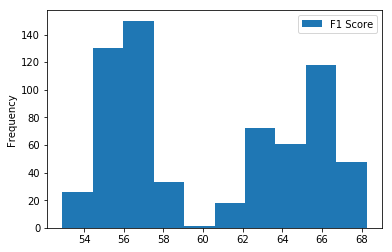

In [47]:
dados_fscore_df.plot(kind='hist', x='Embedding', y='F1 Score')

/home/pedro/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


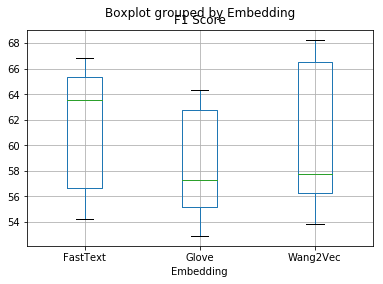

In [48]:
dados_fscore_df.boxplot(column='F1 Score', by='Embedding')

/home/pedro/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


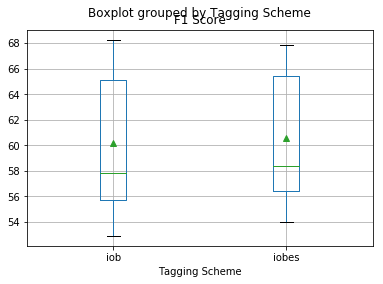

In [49]:
tagging_scheme_axes = dados_fscore_df.boxplot(column='F1 Score', by='Tagging Scheme', showmeans=True, return_type='axes')

In [50]:
lower_plot = dados_fscore_df.boxplot(column='F1 Score', by='Lower', showmeans=True, ax=tagging_scheme_axes)

/home/pedro/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:5847: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  return_type=return_type, **kwds)
/home/pedro/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


/home/pedro/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


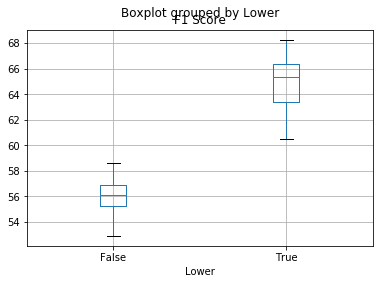

In [51]:
dados_fscore_df.boxplot(column='F1 Score', by='Lower')

/home/pedro/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


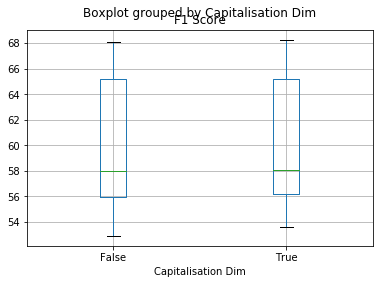

In [52]:
plot = dados_fscore_df.boxplot(column='F1 Score', by='Capitalisation Dim')
#fig = plot.figure
#fig.savefig('cap_dim.png')

/home/pedro/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


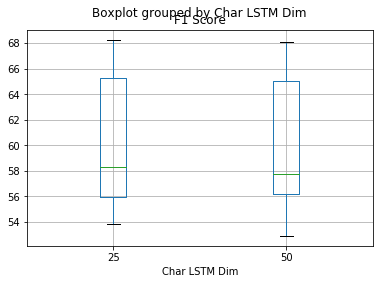

In [53]:
dados_fscore_df.boxplot(column='F1 Score', by='Char LSTM Dim')

/home/pedro/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


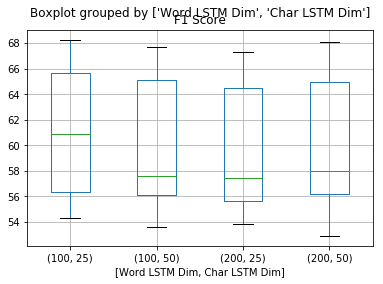

In [54]:
dados_fscore_df.boxplot(column='F1 Score', by=['Word LSTM Dim','Char LSTM Dim'])

In [55]:
dados_wang_df = dados_fscore_df[dados_fscore_df['Embedding'] == 'Wang2Vec']
del dados_wang_df['Embedding']
dados_wang_df

,Epochs,Scenario,Tagging Scheme,Capitalisation Dim,Lower,Char LSTM Dim,Word LSTM Dim,F1 Score
0,5,selective,iob,False,False,25,100,56.79
32,5,selective,iob,False,False,25,100,56.07
64,5,selective,iob,False,False,25,100,57.02
128,5,selective,iob,False,False,25,100,56.15
192,5,selective,iob,False,False,25,100,55.59
224,5,selective,iob,False,False,25,100,56.36
1,5,selective,iob,False,False,25,200,56.43
33,5,selective,iob,False,False,25,200,53.82
65,5,selective,iob,False,False,25,200,54.81
97,5,selective,iob,False,False,25,200,53.90


In [56]:
dados_wang_df.pivot_table(columns=['Char LSTM Dim'], aggfunc=[np.mean, np.max, np.min, np.std])

mean                   amax                  amin  \
Char LSTM Dim               25          50         25         50         25   
Capitalisation Dim    0.517544    0.522124       True       True      False   
Epochs                5.000000    5.000000          5          5          5   
F1 Score             60.917807   60.959027      68.26      68.07      53.82   
Lower                 0.447368    0.442478       True       True      False   
Scenario                   NaN         NaN  selective  selective  selective   
Tagging Scheme             NaN         NaN      iobes      iobes        iob   
Word LSTM Dim       148.245614  147.787611        200        200        100   

                                     std             
Char LSTM Dim              50         25         50  
Capitalisation Dim      False   0.501898   0.501735  
Epochs                      5   0.000000   0.000000  
F1 Score                53.87   5.273888   5.218180  
Lower                   False   0.499417   0.498893  
Scenario            selective        NaN        NaN  
Tagging Scheme            iob        NaN        NaN  
Word LSTM Dim             100  50.189828  50.173529

In [57]:
dados_wang_df.pivot_table(columns=['Word LSTM Dim'], aggfunc=[np.mean, np.max, np.min, np.std])

mean                  amax                  amin  \
Word LSTM Dim             100        200        100        200        100   
Capitalisation Dim   0.550847   0.486239       True       True      False   
Char LSTM Dim       37.500000  37.385321         50         50         25   
Epochs               5.000000   5.000000          5          5          5   
F1 Score            61.383220  60.456697      68.26      68.07      54.68   
Lower                0.474576   0.412844       True       True      False   
Scenario                  NaN        NaN  selective  selective  selective   
Tagging Scheme            NaN        NaN      iobes      iobes        iob   

                                     std             
Word LSTM Dim             200        100        200  
Capitalisation Dim      False   0.499529   0.502119  
Char LSTM Dim              25  12.553305  12.557209  
Epochs                      5   0.000000   0.000000  
F1 Score                53.82   5.248079   5.201198  
Lower                   False   0.501483   0.494619  
Scenario            selective        NaN        NaN  
Tagging Scheme            iob        NaN        NaN

In [29]:
dados_wang_df.pivot_table(columns=['Word LSTM Dim', 'Char LSTM Dim'], aggfunc=[np.mean, np.max, np.min, np.std])

mean       amax  \
                   Word LSTM Dim Char LSTM Dim                         
Capitalisation Dim 100           25              0.576271       True   
                                 50              0.525424       True   
                   200           25              0.454545       True   
                                 50              0.518519       True   
Epochs             100           25              5.000000          5   
                                 50              5.000000          5   
                   200           25              5.000000          5   
                                 50              5.000000          5   
F1 Score           100           25             61.939492      68.26   
                                 50             60.826949      67.69   
                   200           25             59.821818      67.27   
                                 50             61.103333      68.07   
Lower              100           25              0.508475       True   
                                 50              0.440678       True   
                   200           25              0.381818       True   
                                 50              0.444444       True   
Precision          100           25             64.526271      72.07   
                                 50             65.216610      72.42   
                   200           25             64.679636      72.08   
                                 50             64.378519      72.78   
Recall             100           25             59.790678      69.27   
                                 50             57.321356      68.38   
                   200           25             55.989273      67.98   
                                 50             58.364444      68.59   
Scenario           100           25                   NaN  selective   
                                 50                   NaN  selective   
                   200           25                   NaN  selective   
                                 50                   NaN  selective   
Tagging Scheme     100           25                   NaN      iobes   
                                 50                   NaN      iobes   
                   200           25                   NaN      iobes   
                                 50                   NaN      iobes   
Training Round     100           25              4.661017          9   
                                 50              4.440678          9   
                   200           25              4.490909          9   
                                 50              4.462963          9   

                                                     amin       std  
                   Word LSTM Dim Char LSTM Dim                       
Capitalisation Dim 100           25                 False  0.498390  
                                 50                 False  0.503640  
                   200           25                 False  0.502519  
                                 50                 False  0.504349  
Epochs             100           25                     5  0.000000  
                                 50                     5  0.000000  
                   200           25                     5  0.000000  
                                 50                     5  0.000000  
F1 Score           100           25                  55.1  5.072441  
                                 50                 54.68  5.403733  
                   200           25                 53.82  5.310713  
                                 50                 53.87  5.054271  
Lower              100           25                 False  0.504219  
                                 50                 False  0.500730  
                   200           25                 False  0.490310  
                                 50                 False  0.501570  
Precision          100           25                 55.9

In [58]:
dados_wang_df.pivot_table(columns=['Tagging Scheme'], aggfunc=[np.mean, np.max, np.min, np.std])

mean                   amax                  amin  \
Tagging Scheme             iob       iobes        iob      iobes        iob   
Capitalisation Dim    0.513274    0.526316       True       True      False   
Char LSTM Dim        37.610619   37.280702         50         50         25   
Epochs                5.000000    5.000000          5          5          5   
F1 Score             60.902212   60.974123      68.26      67.87      53.82   
Lower                 0.451327    0.438596       True       True      False   
Scenario                   NaN         NaN  selective  selective  selective   
Word LSTM Dim       146.017699  150.000000        200        200        100   

                                     std             
Tagging Scheme          iobes        iob      iobes  
Capitalisation Dim      False   0.502050   0.501511  
Char LSTM Dim              25  12.555188  12.553256  
Epochs                      5   0.000000   0.000000  
F1 Score                53.97   5.455140   5.030446  
Lower                   False   0.499842   0.498406  
Scenario            selective        NaN        NaN  
Word LSTM Dim             100  50.063171  50.220752

In [59]:
dados_wang_df.pivot_table(columns=['Capitalisation Dim', 'Lower'], aggfunc=[np.mean, np.max, np.min, np.std])

mean       amax       amin  \
               Capitalisation Dim Lower                                     
Char LSTM Dim  False              False   37.083333         50         25   
                                  True    37.755102         50         25   
               True               False   37.878788         50         25   
                                  True    37.019231         50         25   
Epochs         False              False    5.000000          5          5   
                                  True     5.000000          5          5   
               True               False    5.000000          5          5   
                                  True     5.000000          5          5   
F1 Score       False              False   56.144000      58.28      53.82   
                                  True    66.605306      68.07      64.95   
               True               False   56.494242      58.64      53.87   
                                  True    66.770769      68.26      65.62   
Scenario       False              False         NaN  selective  selective   
                                  True          NaN  selective  selective   
               True               False         NaN  selective  selective   
                                  True          NaN  selective  selective   
Tagging Scheme False              False         NaN      iobes        iob   
                                  True          NaN      iobes        iob   
               True               False         NaN      iobes        iob   
                                  True          NaN      iobes        iob   
Word LSTM Dim  False              False  155.000000        200        100   
                                  True   146.938776        200        100   
               True               False  146.969697        200        100   
                                  True   142.307692        200        100   

                                               std  
               Capitalisation Dim Lower             
Char LSTM Dim  False              False  12.598482  
                                  True   12.626907  
               True               False  12.590002  
                                  True   12.612615  
Epochs         False              False   0.000000  
                                  True    0.000000  
               True               False   0.000000  
                                  True    0.000000  
F1 Score       False              False   1.083981  
                                  True    0.688468  
               True               False   0.956008  
                                  True    0.562323  
Scenario       False              False        NaN  
                                  True         NaN  
               True               False        NaN  
                                  True         NaN  
Tagging Scheme False              False        NaN  
                                  True         NaN  
               True               False        NaN  
                                  True         NaN  
Word LSTM Dim  False              False  50.169205  
                                  True   50.423378  
               True               False  50.290531  
                                  True   49.886750

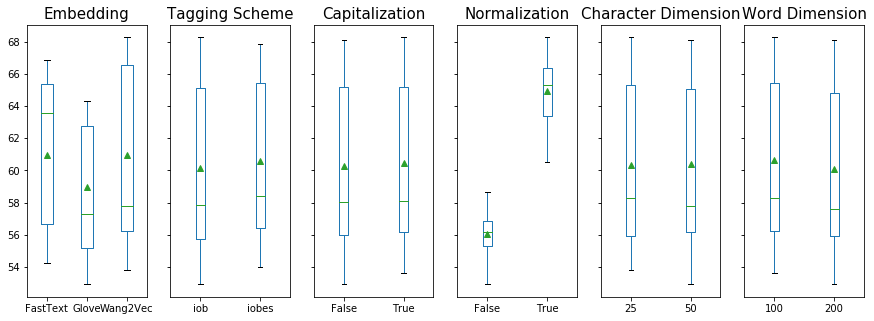

In [80]:
cols_alias = {'Embedding': 'Embedding', 'Tagging Scheme': 'Tagging Scheme', 'Capitalisation Dim': 'Capitalization', 'Lower': 'Normalization', 'Char LSTM Dim': 'Character Dimension', 'Word LSTM Dim': 'Word Dimension'}
fig, axes = plt.subplots(1, 6, figsize=(15, 5), sharey=True)

for idx, column in enumerate(cols_alias.keys()):
    idf = dados_fscore_df[['F1 Score',column]].pivot(columns=column)
    #print(idf)
    
    idf.plot.box(ax=axes[idx], showmeans=True)
    axes[idx].set_title(cols_alias.get(column), fontsize=15)
    axes[idx].set_xticklabels([e[1] for e in idf.columns])

plt.show()
fig.savefig('parameters_box_plots.pdf',bbox_inches='tight')

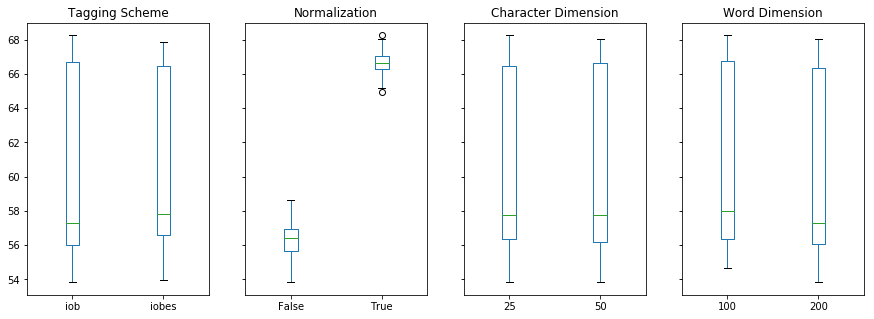

In [33]:
cols_alias = {'Tagging Scheme': 'Tagging Scheme', 'Lower': 'Normalization', 'Char LSTM Dim': 'Character Dimension', 'Word LSTM Dim': 'Word Dimension'}
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=True)

for idx, column in enumerate(cols_alias.keys()):
    idf = dados_wang_df[['F1 Score',column]].pivot(columns=column)
    
    idf.plot.box(ax=axes[idx])
    axes[idx].set_title(cols_alias.get(column))
    axes[idx].set_xticklabels([e[1] for e in idf.columns])

plt.show()
fig.savefig('parameters_box_plots_wang.png')

<class 'pandas.core.frame.DataFrame'>
iob
iobes
<class 'pandas.core.frame.DataFrame'>
False
True
<class 'pandas.core.series.Series'>
MultiIndex(levels=[['F1 Score'], [100, 200], [25, 50]],
           labels=[[0, 0, 0, 0], [0, 0, 1, 1], [0, 1, 0, 1]],
           names=[None, 'Word LSTM Dim', 'Char LSTM Dim'])
0
<class 'pandas.core.frame.DataFrame'>
100
200


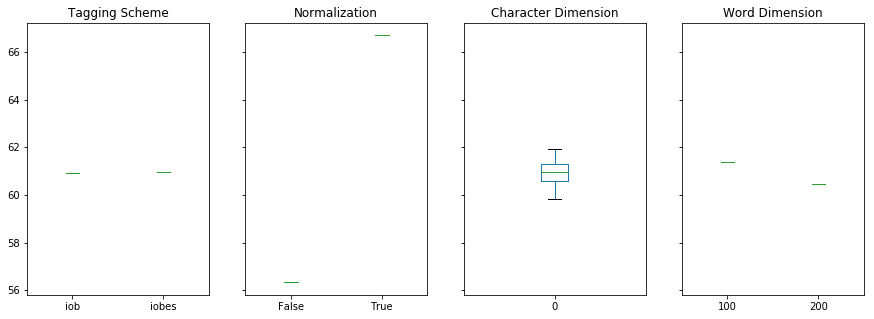

In [34]:
cols_alias = {'Tagging Scheme': {'label': 'Tagging Scheme', 'columns': ['Tagging Scheme']}, 
              'Lower': {'label': 'Normalization', 'columns': ['Lower']}, 
              'Char LSTM Dim': {'label': 'Character Dimension', 'columns': ['Word LSTM Dim','Char LSTM Dim']}, 
              'Word LSTM Dim': {'label': 'Word Dimension', 'columns': ['Word LSTM Dim']}}
#cols_alias = {'Tagging Scheme': ('Tagging Scheme','Tagging Scheme'), 'Lower': ('Normalization','Lower'), 'Char LSTM Dim': ('Character Dimension','Char LSTM Dim'), 'Word LSTM Dim': ('Word Dimension','Word LSTM Dim')}
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=True)

for idx, column in enumerate(cols_alias.keys()):
    columns = cols_alias.get(column)['columns']
    label = cols_alias.get(column)['label']
    #print(columns, type(columns), len(columns))
    data = [column for column in columns]
    #print(data)
    data.insert(0, 'F1 Score')
    #print(columns, data)
    idf = dados_wang_df[data].pivot_table(columns=columns)
    #idf = dados_wang_df[data].pivot(columns=columns[0])
    idf.plot.box(ax=axes[idx])
    axes[idx].set_title(label)
    print(type(idf))
    if isinstance(idf, pd.core.series.Series):
        idf = idf.to_frame()
        print(idf.index)
    for column in idf.columns:
        print(column)
    axes[idx].set_xticklabels([e for e in idf.columns])

plt.show()
fig.savefig('parameters_box_plots_wang.png')